# Homework #6

## K-means Clustering

### Import Libraries
We will use numpy to load the data, and matplotlib to plot the results out. time is used to measure performance. linalg is imported for spectral clustering in the end.

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import time
from scipy import linalg as LA

### Loading the data in

In [2]:
circle = np.loadtxt("circle.txt", delimiter=",")
moon = np.loadtxt("moon.txt", delimiter=",")

### Initialise Centroid
We will first initialise the centroids. The configurable parameters are as below:
  * data = input data
  * k = number of clusters, default as 2
  * method = initial centroid method, default as random. Options: random, badInit, zeroInit, kmeans++
  * display = boolean indicating whether or not to display any output. Used to avoid flooding the page
  
We use the square root of the summation of all the squared components to calculate the Euclidean distance whenever necessary.

The initCentroid method outputs a Matrix with the centroid data points and a plots a graph which marks all the centroids with a star of different colour.
We use "color = iter(cm.rainbow(np.linspace(0, 1, k)))" to cycle through colours for each of the k centroids.

We will demonstrate the different initialisation methods below with k=5 to make the feature of each method more obvious.

In [245]:
def initCentroid(data, method="random", k=2, display=True):
    if (method=="random"):
        result = data[np.random.choice(data.shape[0], k, replace=False)]
    if (method=="kmeans++"):
        euclideanMatrixAllCentroid = np.ndarray(shape=(data.shape[0], 0))
        allCentroid = np.ndarray(shape=(0,data.shape[1]))
        first = data[np.random.choice(data.shape[0], 1, replace=False)]
        allCentroid = np.concatenate((allCentroid, first), axis=0)
        repeatedCent = np.repeat(first, data.shape[0], axis=0)
        deltaMatrix = abs(np.subtract(data, repeatedCent))
        euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
        indexNextCent = (np.argmax(np.matrix(euclideanMatrix)))
        if(k>1):
            for a in range(1,k):
                nextCent = np.matrix(data[np.asscalar(indexNextCent),:])
                allCentroid = np.concatenate((allCentroid, nextCent), axis=0)
                for i in range(0,allCentroid.shape[0]):
                    repeatedCent = np.repeat(allCentroid[i,:], data.shape[0], axis=0)
                    deltaMatrix = abs(np.subtract(data, repeatedCent))
                    euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
                    euclideanMatrixAllCentroid = \
                        np.concatenate((euclideanMatrixAllCentroid, euclideanMatrix), axis=1)
                euclideanFinal = np.min(np.matrix(euclideanMatrixAllCentroid), axis=1)
                indexNextCent = np.argmax(np.matrix(euclideanFinal))
        result = allCentroid
    if (method=="badInit"):
        allCentroid = np.ndarray(shape=(0,data.shape[1]))
        firstIndex = np.random.randint(0,data.shape[0])
        first = np.matrix(data[firstIndex,:])
        data = np.delete(data, firstIndex, 0)
        allCentroid = np.concatenate((allCentroid, first), axis=0)
        repeatedCent = np.repeat(first, data.shape[0], axis=0)
        deltaMatrix = abs(np.subtract(data, repeatedCent))
        euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
        indexNextCent = (np.argmin(np.matrix(euclideanMatrix)))
        if(k>1):
            for a in range(1,k):
                nextCent = np.matrix(data[np.asscalar(indexNextCent),:])
                data = np.delete(data, np.asscalar(indexNextCent), 0)
                euclideanMatrixAllCentroid = np.ndarray(shape=(data.shape[0], 0))
                allCentroid = np.concatenate((allCentroid, nextCent), axis=0)
                for i in range(0,allCentroid.shape[0]):
                    repeatedCent = np.repeat(allCentroid[i,:], data.shape[0], axis=0)
                    deltaMatrix = abs(np.subtract(data, repeatedCent))
                    euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
                    euclideanMatrixAllCentroid = \
                        np.concatenate((euclideanMatrixAllCentroid, euclideanMatrix), axis=1)
                euclideanFinal = np.min(np.matrix(euclideanMatrixAllCentroid), axis=1)
                indexNextCent = np.argmin(np.matrix(euclideanFinal))
        result = allCentroid
    if (method=="zeroInit"):
        result = np.matrix(np.full((k,data.shape[1]),0))
    if (display==True):
        color = iter(cm.rainbow(np.linspace(0, 1, k)))
        plt.figure("centroid initialization")
        plt.title("centroid initialization")
        plt.scatter(data[:, 0], data[:, 1], marker=".", s=100)
        for i in range(0,k):
            col = next(color)
            plt.scatter((result[i, 0]), (result[i, 1]), marker="*", s=400, c=[col])
            plt.text((result[i, 0]), (result[i, 1]), str(i+1), fontsize=20)
    return result

#### Random Init
The default initial centroid. Randomly choose k data points to be the centroid

array([[ 0.98477527,  0.07472402],
       [-0.96667053, -0.02623542],
       [ 0.439303  ,  0.81924711],
       [ 0.67432022,  0.78618331],
       [ 0.59862728,  0.16147524]])

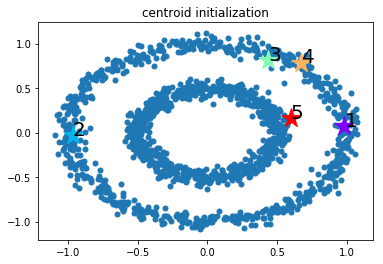

In [21]:
initCentroid(circle,k=5)

#### Bad Init
A bad initialisation where a random point is chosen and all the k centroids are clustered together at that point.

matrix([[-0.64848329, -0.91823269],
        [-0.60419143, -0.87788201],
        [-0.60507092, -0.87011202],
        [-0.60377589, -0.86752011],
        [-0.59701052, -0.84820263]])

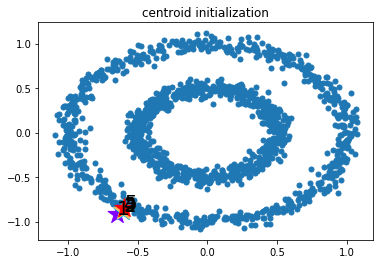

In [15]:
initCentroid(circle,"badInit",5)

#### Zero Init
All centroids initialised at the origin.

matrix([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

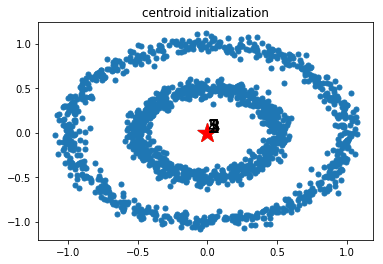

In [16]:
initCentroid(circle,"zeroInit",5)

#### Kmeans++ Init
After the first centroid is randomly generated, for subsequent centroids, the data point with the maximum Euclidean distance away from the previous centroids is chosen as the next centroid. 

matrix([[-0.84215311, -0.51361453],
        [ 1.032332  ,  0.44981469],
        [-0.49575985,  0.98871127],
        [ 0.54260314, -0.89256533],
        [ 0.16234906,  0.39920545]])

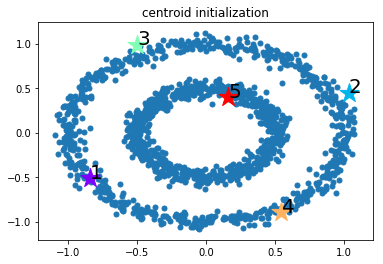

In [17]:
initCentroid(circle,"kmeans++",5)

### Plot Cluster Results
The function below colours the data points according to the centroids they are assigned to at each iteration. The data points will have the same colour as their respective centroids.
The resulting graph would indicate the iteration it is at, the centroid positions, and whether or not is has converged.
The parameters are as below:
  * listClusterMembers = List containing members of each cluster
  * centroid = List of all the centroids and their coordinates
  * iteration = An integer of the current iteration
  * converged = A boolean indicating convergence

In [232]:
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]), marker=".", s=100, c=[col])
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker="*", s=400, c=[col], edgecolors="black")
    if(converged == 0):
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if (converged == 1):
        plt.show(block=True)

### Clustering
Now we come to the actual clustering step. In this step, we will loop two actions until convergence:
  * Assigning data to cluster
    * We will create a matrix with each of the data point's Euclidean distance from each centroid
    * We then use argmin to find out which centroid is closest to the data point and thus assign it to that cluster
  * Choose new centroid
    * The new centroids will be chosen by taking the mean of all the data points in each respective cluster
Convergence is reached when the new centroid is the same as the old centroid.

The final parameter is a boolean indicating whether to print all iterations or only the final iteration.
The display parameter is a boolean indicating whether or not to print or plot any output at all.
These parameters are used to reduce the output field so that we may save space in the report.

In [123]:
def kMeans(data, method="random", k=2, final=False,display=True):
    centroidInit = initCentroid(data, method, k, display)
    nCluster = centroidInit.shape[0]
    #looping until converged
    global iterationCounter
    iterationCounter = 0
    centroidInit = np.matrix(centroidInit)
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        #assign data to cluster whose centroid is the closest one
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data,centroidRepeated))
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]):#assign data to cluster regarding cluster matrix
            listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
        #calculate new centroid
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0,nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        #break when converged
        if(display==False):
            pass
        elif(final==False):
            print("iter: ", iterationCounter)
            print("centroid: ", newCentroid)
        if((centroidInit == newCentroid).all()):
            break
        # update new centroid
        centroidInit = newCentroid
        if(display==False):
            pass
        elif(final==False):
            plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
    if(display==False):
        pass
    elif(final==True):
        print("Final iterration: ", iterationCounter)
        print("Final centroid: ", newCentroid)
    if(display==True):
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter) + " (converged)", 1)
    
kMeans(circle,display=False)

### Example
We will demonstrate the code and the resulting plotted graphs with the default settings for both circle and moon datasets.

iter:  1
centroid:  [[-0.50394712  0.03258573]
 [ 0.44735157 -0.03012755]]


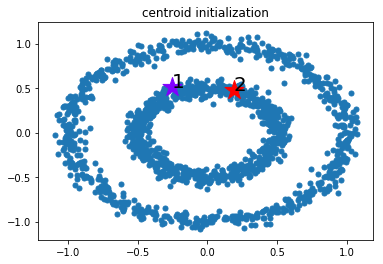

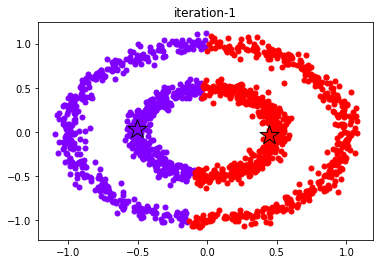

iter:  2
centroid:  [[-0.48978125  0.03755149]
 [ 0.46110317 -0.03658266]]


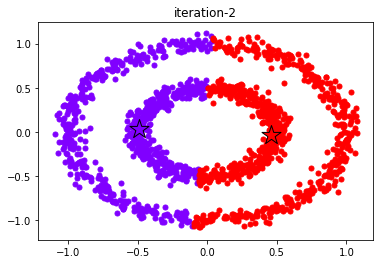

iter:  3
centroid:  [[-0.48179335  0.04245395]
 [ 0.46834043 -0.0425124 ]]


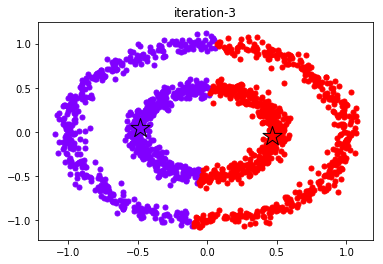

iter:  4
centroid:  [[-0.47760266  0.046607  ]
 [ 0.47175598 -0.04728567]]


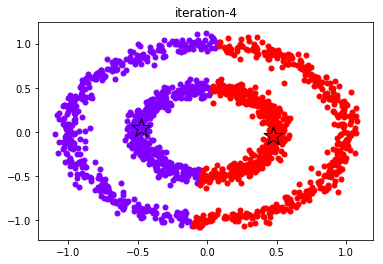

iter:  5
centroid:  [[-0.4752673   0.05114858]
 [ 0.47322038 -0.05217766]]


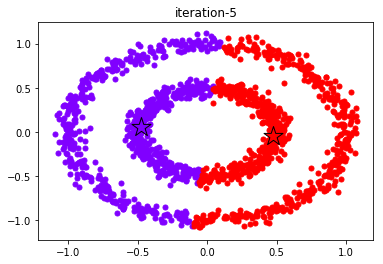

iter:  6
centroid:  [[-0.47618387  0.05471722]
 [ 0.47161134 -0.05543437]]


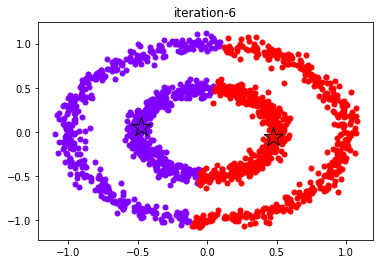

iter:  7
centroid:  [[-0.47731981  0.05609603]
 [ 0.47022185 -0.05649989]]


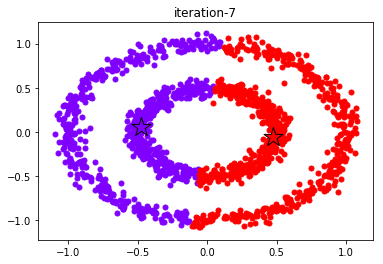

iter:  8
centroid:  [[-0.47786639  0.05695759]
 [ 0.46950662 -0.05719677]]


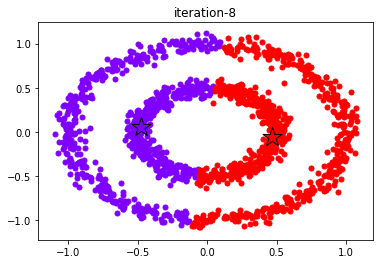

iter:  9
centroid:  [[-0.47786639  0.05695759]
 [ 0.46950662 -0.05719677]]


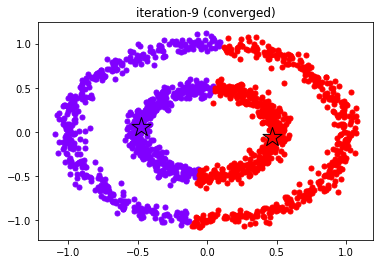

In [150]:
kMeans(circle)

iter:  1
centroid:  [[ 1.15525507 -0.10622563]
 [-0.19236523  0.62877424]]


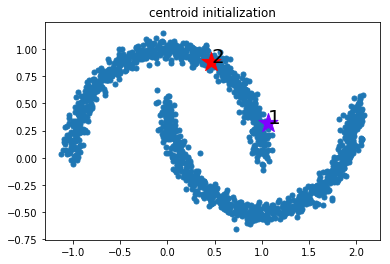

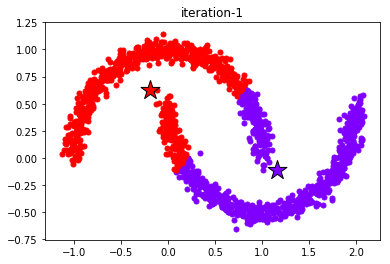

iter:  2
centroid:  [[ 1.18106473 -0.07802407]
 [-0.21195614  0.59533774]]


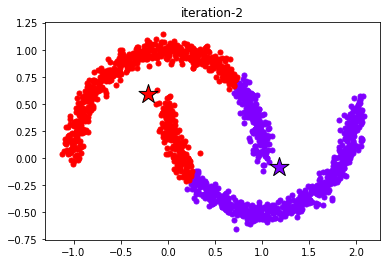

iter:  3
centroid:  [[ 1.18713745 -0.07070221]
 [-0.2144745   0.58590754]]


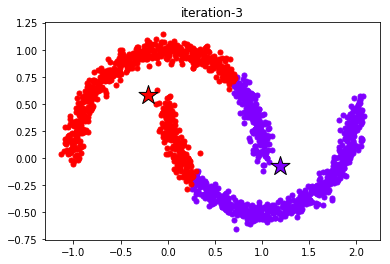

iter:  4
centroid:  [[ 1.18953064 -0.0703984 ]
 [-0.21314711  0.58381442]]


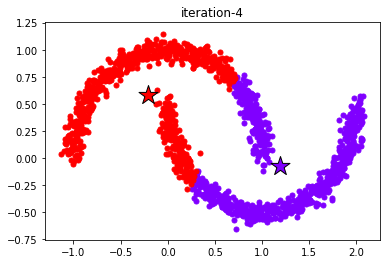

iter:  5
centroid:  [[ 1.19070113 -0.07030205]
 [-0.21245438  0.58282994]]


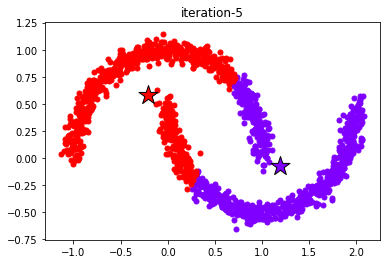

iter:  6
centroid:  [[ 1.19190651 -0.07012772]
 [-0.21179617  0.58176828]]


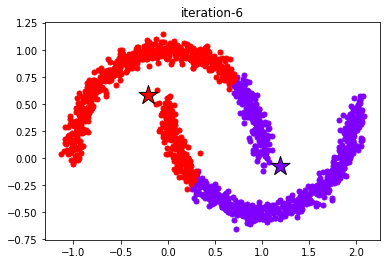

iter:  7
centroid:  [[ 1.19311701 -0.06994546]
 [-0.21114174  0.58070184]]


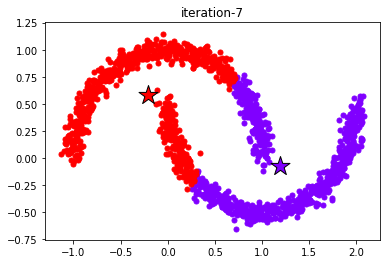

iter:  8
centroid:  [[ 1.19432895 -0.06975919]
 [-0.21048729  0.57963467]]


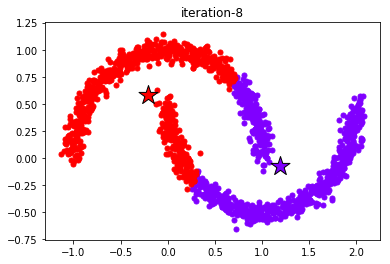

iter:  9
centroid:  [[ 1.19556046 -0.06953215]
 [-0.20985126  0.57852934]]


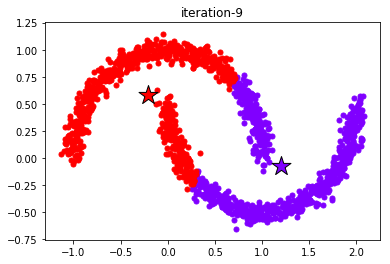

iter:  10
centroid:  [[ 1.19672891 -0.06944281]
 [-0.20914957  0.5775675 ]]


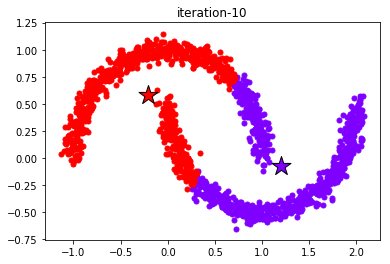

iter:  11
centroid:  [[ 1.1979278  -0.06929092]
 [-0.20847747  0.57654511]]


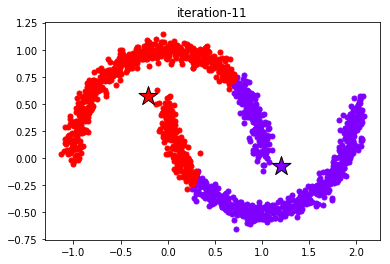

iter:  12
centroid:  [[ 1.19909917 -0.06920018]
 [-0.20777614  0.57558766]]


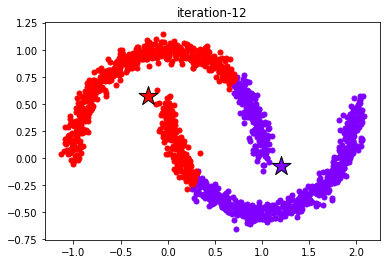

iter:  13
centroid:  [[ 1.19909917 -0.06920018]
 [-0.20777614  0.57558766]]


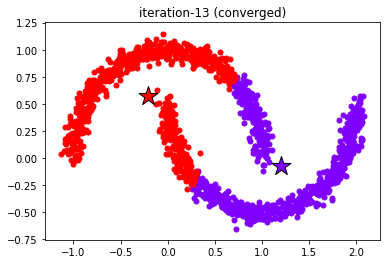

In [116]:
kMeans(moon)

As can be seen from above, kmeans clustering is unable to classify the data correctly. This is likely because we are only taking into account the Euclidean distance between the points and the centroid, which is insufficient to cluster data cluster of such shapes. kmeans works best for clusters of data with spherical gaussian distribution that does not overlay completely like the circle dataset does.

### Adjusting k(amount of clusters) and initialisation method
We will now measure the performance as we vary the k and method parameters. The iterations taken will be used as a measure of speed performance of the function. HOWEVER, since all the methods depend on some degree of randomness, the iteration count is likely to have a large variance. As a result, We would need to calculate the average of the iteration count over a number of trials. 

The function below shall evaluate the average iteration count over n trials.

In [125]:
def iterave(n,data, method="random", k=2):
    average=0
    for i in range(n):
        kMeans(data, method, k,display=False)
        average+=iterationCounter
    average=float(average)/n
    return average

### Testing with different k
We will now test both datasets with k ranging from 2 to 5, using the default random initialisation.

Final iterration:  9
Final centroid:  [[ 0.27213342 -0.39118756]
 [-0.27237706  0.39092575]]


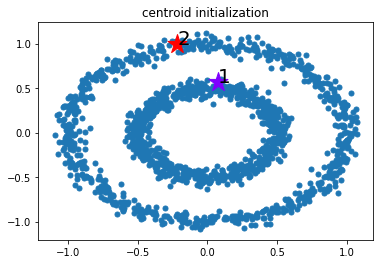

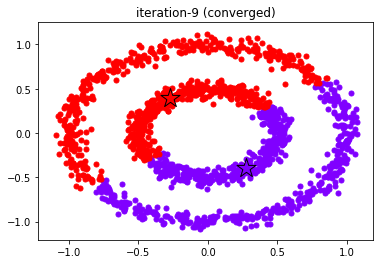

11.033333333333333

In [128]:
kMeans(circle,k=2,final=True)
iterave(30,circle,k=2)

Final iterration:  7
Final centroid:  [[ 0.37791934 -0.49634184]
 [ 0.25802093  0.56849073]
 [-0.6107113  -0.07442728]]


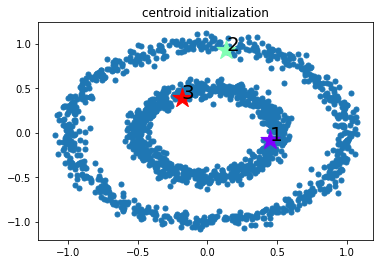

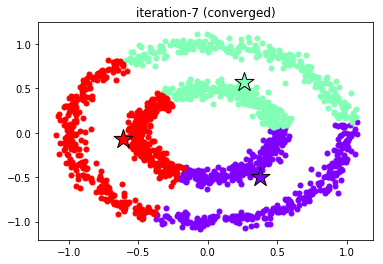

11.8

In [130]:
kMeans(circle,k=3,final=True)
iterave(30,circle,k=3)

Final iterration:  9
Final centroid:  [[-0.4288165   0.51326369]
 [ 0.51232872  0.44637337]
 [ 0.43319779 -0.5165312 ]
 [-0.52702021 -0.42660328]]


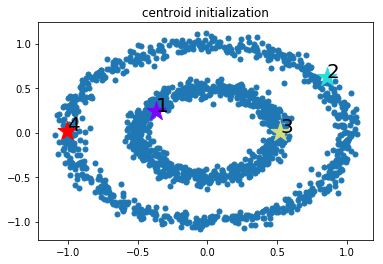

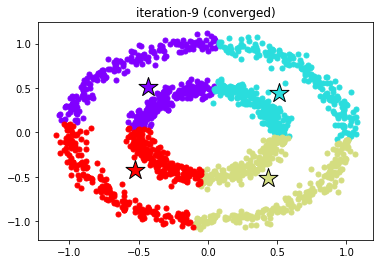

15.166666666666666

In [131]:
kMeans(circle,k=4,final=True)
iterave(30,circle,k=4)

Final iterration:  16
Final centroid:  [[-0.08914708  0.68997588]
 [-0.6875928   0.10908355]
 [ 0.48095174 -0.50844695]
 [-0.33402968 -0.62860829]
 [ 0.63671782  0.30133428]]


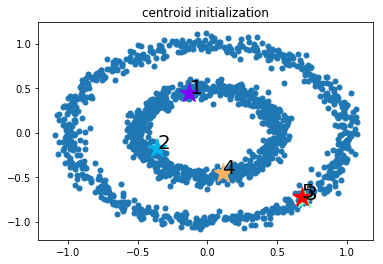

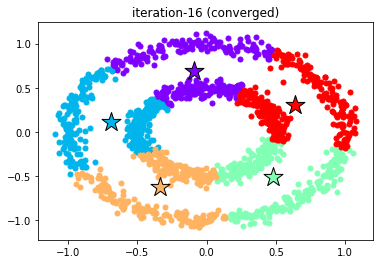

18.466666666666665

In [132]:
kMeans(circle,k=5,final=True)
iterave(30,circle,k=5)

Final iterration:  17
Final centroid:  [[-0.20777614  0.57558766]
 [ 1.19909917 -0.06920018]]


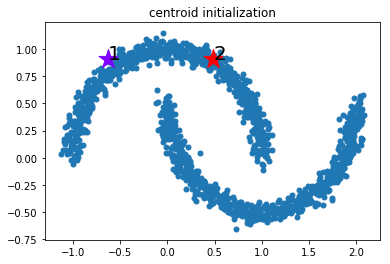

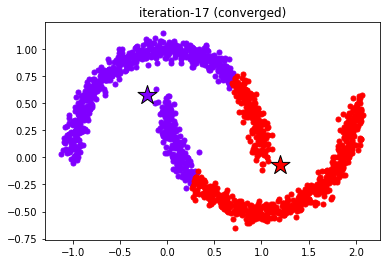

12.133333333333333

In [133]:
kMeans(moon,k=2,final=True)
iterave(30,moon,k=2)

Final iterration:  25
Final centroid:  [[ 1.63081444 -0.13866108]
 [ 0.58800381  0.13183721]
 [-0.4237034   0.67201824]]


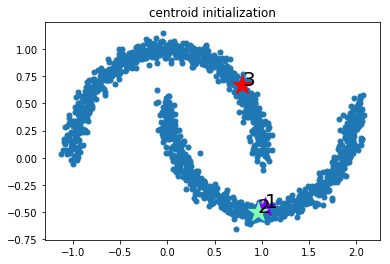

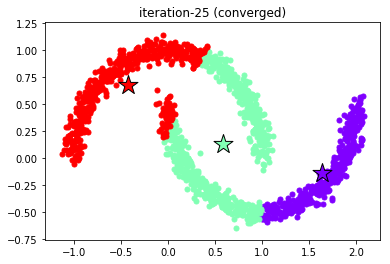

20.966666666666665

In [134]:
kMeans(moon,k=3,final=True)
iterave(30,moon,k=3)

Final iterration:  26
Final centroid:  [[ 1.73387852 -0.06816151]
 [ 0.68751942 -0.18616482]
 [ 0.2798684   0.72495727]
 [-0.75034648  0.55882209]]


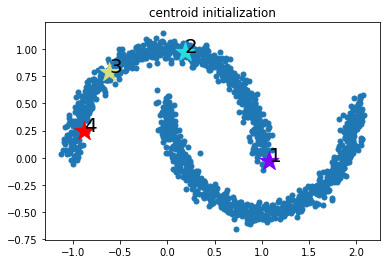

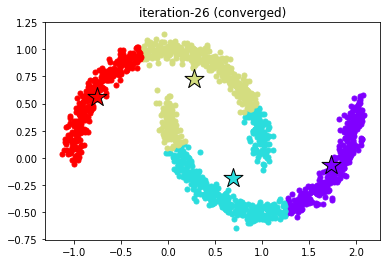

19.333333333333332

In [135]:
kMeans(moon,k=4,final=True)
iterave(30,moon,k=4)

Final iterration:  43
Final centroid:  [[-0.83859328  0.46769148]
 [ 0.83698218  0.47325428]
 [ 0.56326417 -0.30699193]
 [ 0.00175495  0.79224837]
 [ 1.71834076 -0.08050171]]


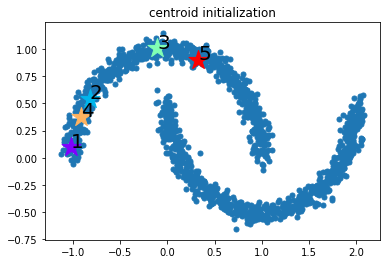

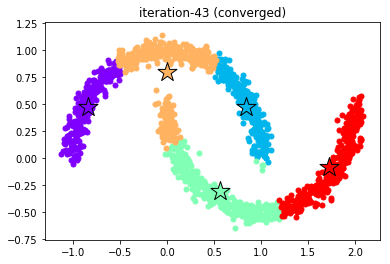

21.633333333333333

In [136]:
kMeans(moon,k=5,final=True)
iterave(30,moon,k=5)

**Analysis**

As we increased the number of clusters, the classification did not get any better. We are still getting wrong results.

At 30 trials each, the average iteration counts for the circle dataset were 11.0, 11.8, 15.2, and 18.5 respectively.
At 30 trials each, the average iteration counts for the moon dataset were 12.1, 21, 19.3, and 21.6 respectively.

Dataset / k | 2 | 3 | 4 | 5 
--- | --- | --- | --- | ---
Moon | 12.133333333333333 | 20.966666666666665 | 19.333333333333332 | 21.633333333333333
Circle | 11.033333333333333 | 11.8 | 15.166666666666666 | 18.466666666666665

This shows that as k is increased, the average iteration count (and consequently the time taken) increases too.

### Testing with different Init Methods
We will now test both datasets with all the initialisation methods.

Final iterration:  14
Final centroid:  [[-0.20777614  0.57558766]
 [ 1.19909917 -0.06920018]]


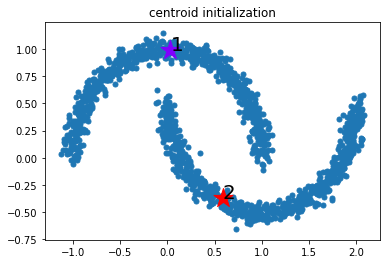

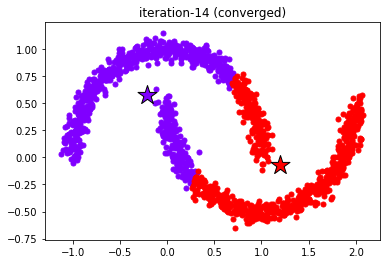

11.3

In [139]:
kMeans(moon,method="random",final=True)
iterave(30,moon)

Final iterration:  17
Final centroid:  [[ 1.19909917 -0.06920018]
 [-0.20777614  0.57558766]]


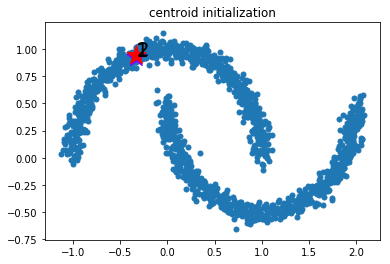

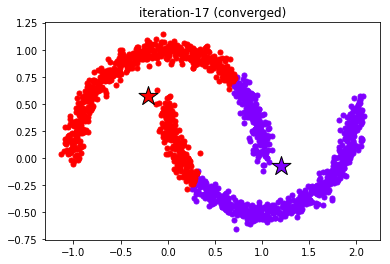

12.933333333333334

In [140]:
kMeans(moon,method="badInit",final=True)
iterave(30,moon,method="badInit")

ValueError: all the input array dimensions except for the concatenation axis must match exactly

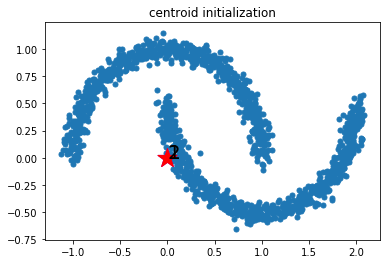

In [142]:
kMeans(moon,method="zeroInit",final=True)
iterave(30,moon,method="zeroInit")

Final iterration:  9
Final centroid:  [[-0.19575731  0.56720766]
 [ 1.21337208 -0.07279239]]


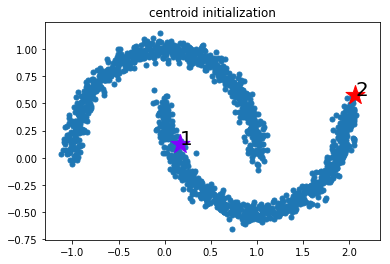

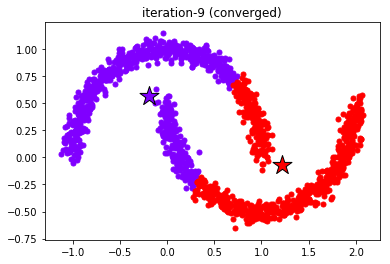

10.366666666666667

In [143]:
kMeans(moon,method="kmeans++",final=True)
iterave(30,moon,method="kmeans++")

Final iterration:  14
Final centroid:  [[-0.40323631  0.24485129]
 [ 0.41022639 -0.25011565]]


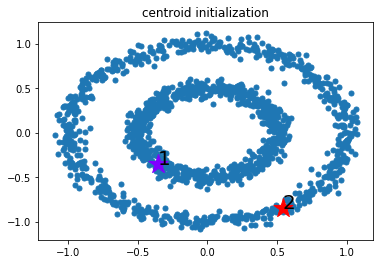

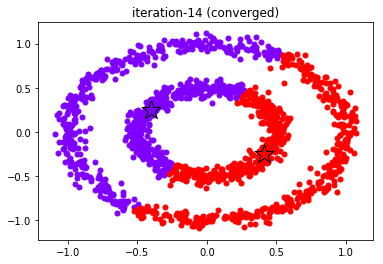

11.466666666666667

In [144]:
kMeans(circle,method="random",final=True)
iterave(30,circle)

Final iterration:  8
Final centroid:  [[-0.32479264  0.34307169]
 [ 0.32963788 -0.34899006]]


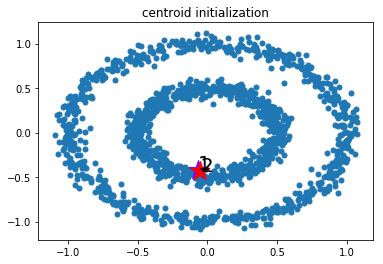

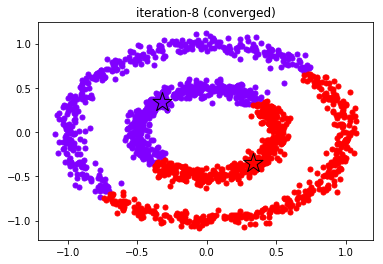

10.366666666666667

In [145]:
kMeans(circle,method="badInit",final=True)
iterave(30,moon,method="badInit")

ValueError: all the input array dimensions except for the concatenation axis must match exactly

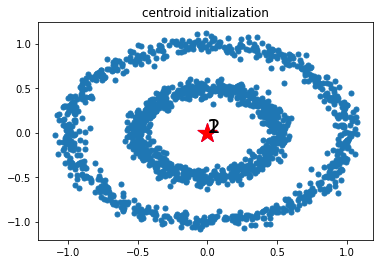

In [148]:
kMeans(circle,method="zeroInit",final=True)
iterave(30,circle,method="zeroInit")

Final iterration:  8
Final centroid:  [[-0.4234776  -0.22421381]
 [ 0.42395998  0.22290919]]


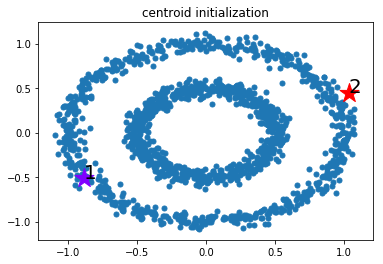

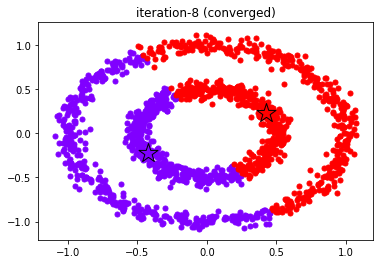

9.566666666666666

In [147]:
kMeans(circle,method="kmeans++",final=True)
iterave(30,circle,method="kmeans++")

**Analysis**

At 30 iterations each, the results are as follow:

Dataset / initMethod | random | bad | zero | kmeans++ 
--- | --- | --- | --- | ---
Moon | 11.3 | 12.933333333333334 | Error | 10.366666666666667
Circle | 11.466666666666667 | 10.366666666666667 | Error | 9.566666666666666

zeroInit returned Error as the initialised centroids were all placed at the same point, the origin( [0,0] in this case). Since the centroids are at the same point, the Euclidean distance of a data point to all the centroids will be same, hence there is no way to decide which centroid/cluster should the data points be assigned to.

As for the rest of the method, we see that badInit fared the worst, followed by random, and kmeans++ performed the best.

badInit does not perform well because the centroids are all close together, and hence not a good predictor/estimator of the actual centroids which should ideally be far apart from each other as clusters are defined.

kmeans++ has the least amount of average iteration count because it is most likely to be close to the final centroids, which will be far apart, so that the clusters would be distinguishable.

## Kernel K-means

We will now attempt to write our own kernel. In kernel K-means, instead of calculating the Euclidean distance with the default method, we will calculate the distance with a RBF kernel. 

### Initialisation

We will first initialise the data points to belong to different clusters. The initCluster method takes in the following parameters:
  * data = data input
  * method = initialisation method. #options: random, byCenterDistance, byOriginDistance
  * k = number of clusters
  * returning = boolean indicating whether or not to return the list of cluster assignment for the data points. Used to minimise screen output.

In [179]:
def initCluster(data, method="random", k=2, returning = True):
    listClusterMember = [[] for i in range(k)]
    if (method == "random"):
        shuffledDataIn = data
        np.random.shuffle(shuffledDataIn)
        for i in range(0, data.shape[0]):
            listClusterMember[i%k].append(data[i,:])
    if (method == "byCenterDistance"):
        center = np.matrix(np.mean(data, axis=0))
        repeatedCent = np.repeat(center, data.shape[0], axis=0)
        deltaMatrix = abs(np.subtract(data, repeatedCent))
        euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
        dataNew = np.array(np.concatenate((euclideanMatrix, data), axis=1))
        dataNew = dataNew[np.argsort(dataNew[:, 0])]
        dataNew = np.delete(dataNew, 0, 1)
        divider = data.shape[0]/k
        for i in range(0, data.shape[0]):
            listClusterMember[np.int(np.floor(i/divider))].append(dataNew[i,:])
    if (method == "byOriginDistance"):
        origin = np.matrix([[0,0]])
        repeatedCent = np.repeat(origin, data.shape[0], axis=0)
        deltaMatrix = abs(np.subtract(data, repeatedCent))
        euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
        dataNew = np.array(np.concatenate((euclideanMatrix, data), axis=1))
        dataNew = dataNew[np.argsort(dataNew[:, 0])]
        dataNew = np.delete(dataNew, 0, 1)
        divider = data.shape[0]/k
        for i in range(0, data.shape[0]):
            listClusterMember[np.int(np.floor(i/divider))].append(dataNew[i,:])
    if (returning==True):
        return listClusterMember
    
    # calculate centroid, only for visualization purpose
    centroid = np.ndarray(shape=(0, data.shape[1]))
    for i in range(0, k):
        memberCluster = np.asmatrix(listClusterMember[i])
        centroidCluster = memberCluster.mean(axis=0)
        centroid = np.concatenate((centroid, centroidCluster), axis=0)
    #plot result in every iteration
    plotResult(listClusterMember, centroid, str(iterationCounter), 0)
    oldTime = np.around(time.time(), decimals=0)
    kernelResultClusterAllCluster = np.ndarray(shape=(data.shape[0], 0))

#### Random Init
Randomly assigning clusters.

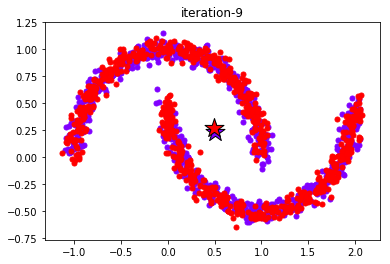

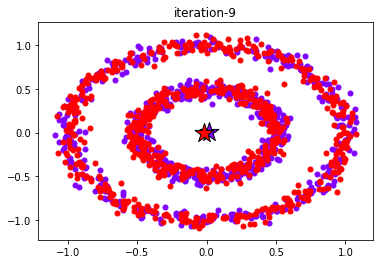

In [166]:
initCluster(moon,returning=False)
initCluster(circle,returning=False)

#### By Origin Distance Init
Assigning cluster based on the data point's distance away from the origin.

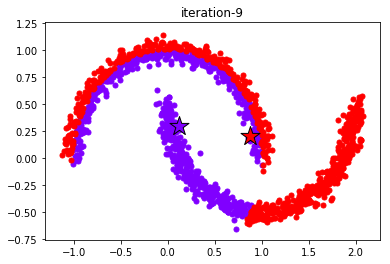

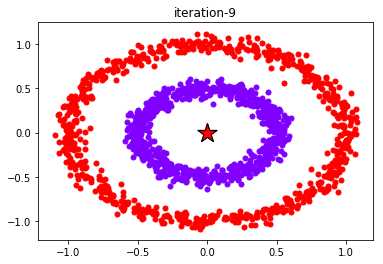

In [167]:
initCluster(moon,method="byOriginDistance",returning=False)
initCluster(circle,method="byOriginDistance",returning=False)

#### By Center Distance Init
Assigning cluster based on the data point's distance away from the total mean of all the data points.
If the data points are evenly distributed around the origin like the circle dataset, then the center would be the origin and it would produce the same result as byOriginDistance method.

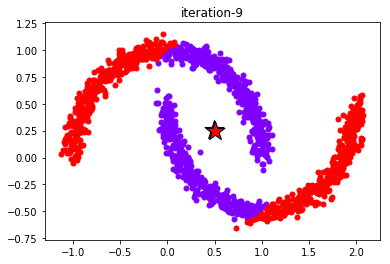

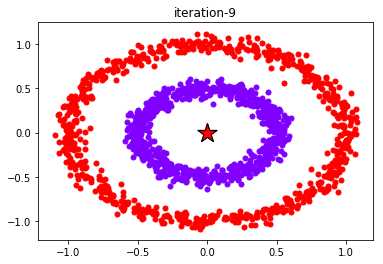

In [168]:
initCluster(moon,method="byCenterDistance",returning=False)
initCluster(circle,method="byCenterDistance",returning=False)

### Plot Cluster Results
The function below colours the data points according to the clusters they are assigned to at each iteration. The data points will have the same colour as their respective centroids.
The resulting graph would indicate the iteration it is at, the centroid positions, and whether or not is has converged.
The parameters are as below:
  * listClusterMembers = List containing members of each cluster
  * centroid = List of all the centroids and their coordinates
  * iteration = An integer of the current iteration
  * converged = A boolean indicating convergence

In [223]:
def plotResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]), marker=".", s=100, c=[col])
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    for i in range(n):
        col = next(color)
        plt.scatter(np.ravel(centroid[i, 0]), np.ravel(centroid[i, 1]), marker="*", s=400, c=[col], edgecolors="black")
    if (converged == 0):
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if (converged == 1):
        plt.show(block=True)

#### RBF Kernel
We will need to define the RBF Kernel formula.

In [ ]:
def RbfKernel(data1, data2, sigma):
    delta =abs(np.subtract(data1, data2))
    squaredEuclidean = (np.square(delta).sum(axis=1))
    result = np.exp(-(squaredEuclidean)/(2*sigma**2))
    return result

#### Calculating distance

We will then refer to the following formula to calculate the distance used to evaluate which cluster should the data point be in:
![alt text](kernel.png "kernel formula")

The formula shown above is the weighted kernel kmeans, but we would be using the non-weighted form where w=1.

There are three terms in the formula.
The first term will be the same for all clusters, hence we may avoid calculating it.
The third term only needs to be computed once for each cluster, hence we may store it and reuse for data points of the same cluster.
The second term will be different for each data point and would need to be calculated for every point. This is where most of the computation time is spent.

In [224]:
def thirdTerm(memberCluster,sigma):
    result = 0
    for i in range(0, memberCluster.shape[0]):
        for j in range(0, memberCluster.shape[0]):
            result = result + RbfKernel(memberCluster[i, :], memberCluster[j, :], sigma)
    result = result / (memberCluster.shape[0] ** 2)
    return result

def secondTerm(dataI, memberCluster,sigma):
    result = 0
    for i in range(0, memberCluster.shape[0]):
        result = result + RbfKernel(dataI, memberCluster[i,:], sigma)
    result = 2 * result / memberCluster.shape[0]
    return result

def kMeansKernel(data, method="random",sigma=5,k=2,display=True,final=False):
    initTime=np.around(time.time(),decimals=0)
    global iterationCounter
    iterationCounter=0
    memberInit = initCluster(data, k=k, method=method)
    #looping until converged
    while(True):
        # calculate centroid, only for visualization purpose
        centroid = np.ndarray(shape=(0, data.shape[1]))
        for i in range(0, k):
            memberCluster = np.asmatrix(memberInit[i])
            centroidCluster = memberCluster.mean(axis=0)
            centroid = np.concatenate((centroid, centroidCluster), axis=0)
        #plot result in every iteration
        if(display==True):
            if((final==False)or(iterationCounter==0)):
                plotResult(memberInit, centroid, str(iterationCounter), 0)
        oldTime = np.around(time.time(), decimals=0)
        kernelResultClusterAllCluster = np.ndarray(shape=(data.shape[0], 0))
        #assign data to cluster whose centroid is the closest one
        for i in range(0, k):#repeat for all cluster
            term3 = thirdTerm(np.asmatrix(memberInit[i]),sigma)
            matrixTerm3 = np.repeat(term3, data.shape[0], axis=0); matrixTerm3 = np.asmatrix(matrixTerm3)
            matrixTerm2 = np.ndarray(shape=(0,1))
            for j in range(0, data.shape[0]): #repeat for all data
                term2 = secondTerm(data[j,:], np.asmatrix(memberInit[i]),sigma)
                matrixTerm2 = np.concatenate((matrixTerm2, term2), axis=0)
            matrixTerm2 = np.asmatrix(matrixTerm2)
            kernelResultClusterI = np.add(-1*matrixTerm2, matrixTerm3)
            kernelResultClusterAllCluster =\
                np.concatenate((kernelResultClusterAllCluster, kernelResultClusterI), axis=1)
        clusterMatrix = np.ravel(np.argmin(np.matrix(kernelResultClusterAllCluster), axis=1))
        listClusterMember = [[] for l in range(k)]
        for i in range(0, data.shape[0]):#assign data to cluster regarding cluster matrix
            listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
        if(display==True):
            if((final==False)or(iterationCounter==0)):
                for i in range(0, k):
                    print("Cluster member numbers-", i, ": ", listClusterMember[0].__len__())
        #break when converged
        boolAcc = True
        for m in range(0, k):
            prev = np.asmatrix(memberInit[m])
            current = np.asmatrix(listClusterMember[m])
            if (prev.shape[0] != current.shape[0]):
                boolAcc = False
                break
            if (prev.shape[0] == current.shape[0]):
                boolPerCluster = (prev == current).all()
            boolAcc = boolAcc and boolPerCluster
            if(boolAcc==False):
                break
        if(boolAcc==True):
            break
        iterationCounter += 1
        #update new cluster member
        memberInit = listClusterMember
        newTime = np.around(time.time(), decimals=0)
        if((display==True)and(final==False)):
            print("iteration-", iterationCounter, ": ", newTime - oldTime, " seconds")
    if(display==True):
        plotResult(listClusterMember, centroid, str(iterationCounter) + ' (converged)', 1)
        print("converged!")
        finalTime=np.around(time.time(),decimals=0)
        totalTimeTaken=finalTime-initTime
        print("Total time taken: " + str(totalTimeTaken))

### Example
We will demonstrate the code and the resulting plotted graphs with the default settings for both circle and moon datasets.

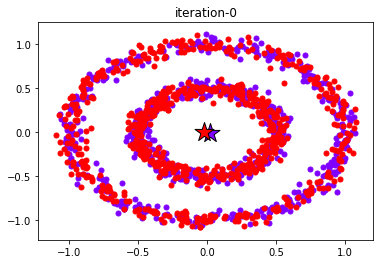

Cluster member numbers- 0 :  747
Cluster member numbers- 1 :  747
iteration- 1 :  151.0  seconds


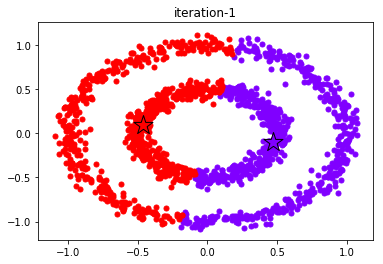

Cluster member numbers- 0 :  750
Cluster member numbers- 1 :  750
iteration- 2 :  154.0  seconds


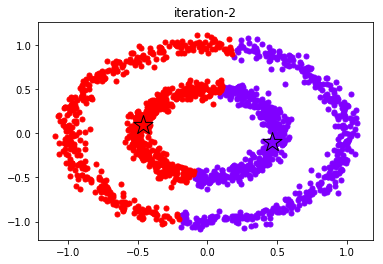

Cluster member numbers- 0 :  751
Cluster member numbers- 1 :  751
iteration- 3 :  135.0  seconds


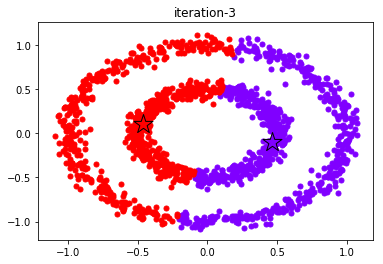

Cluster member numbers- 0 :  751
Cluster member numbers- 1 :  751


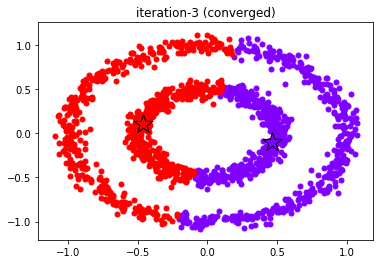

converged!
Total time taken: 574.0


In [186]:
kMeansKernel(circle)

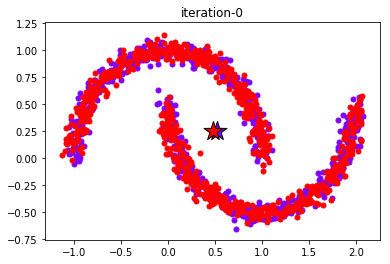

Cluster member numbers- 0 :  726
Cluster member numbers- 1 :  726
iteration- 1 :  135.0  seconds


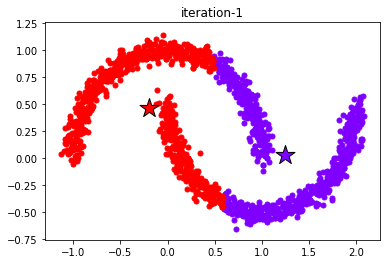

Cluster member numbers- 0 :  735
Cluster member numbers- 1 :  735
iteration- 2 :  131.0  seconds


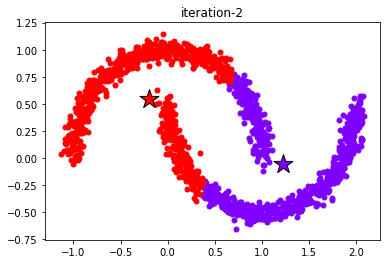

Cluster member numbers- 0 :  742
Cluster member numbers- 1 :  742
iteration- 3 :  134.0  seconds


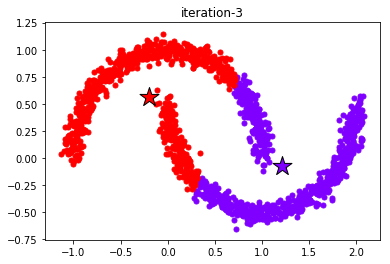

Cluster member numbers- 0 :  742
Cluster member numbers- 1 :  742
iteration- 4 :  131.0  seconds


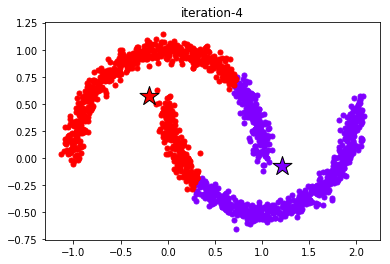

Cluster member numbers- 0 :  741
Cluster member numbers- 1 :  741
iteration- 5 :  132.0  seconds


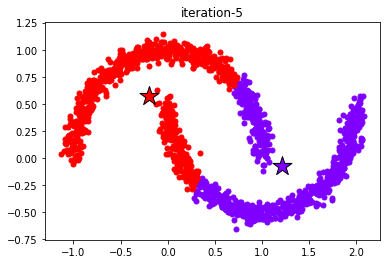

Cluster member numbers- 0 :  741
Cluster member numbers- 1 :  741


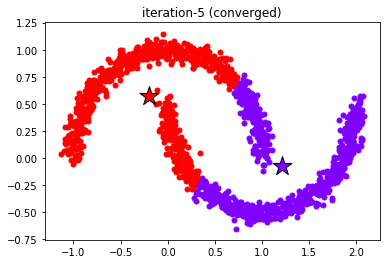

converged!
Total time taken: 797.0


In [187]:
kMeansKernel(moon)

When using the default random initialisation, we can see that kernel kmeans still returns the wrong result. We would therefore try other init methods to see if it could help to classify correctly.

### Adjusting k(amount of clusters) and initialisation method
We will now measure the performance as we vary the k and method parameters. However, due to the immense amount of taken taken to compute the kernel each time, we would not be able to carry out large amount of trials as we did for k means clustering. Instead, we will be measuring the time taken to run the function once.

### Testing with different k
We will now test both datasets with k ranging from 2 to 5, using the default random initialisation.

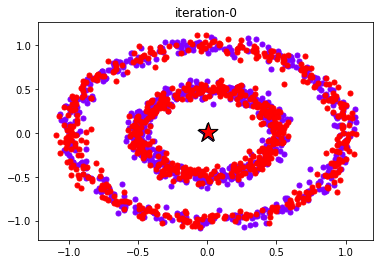

Cluster member numbers- 0 :  757
Cluster member numbers- 1 :  757


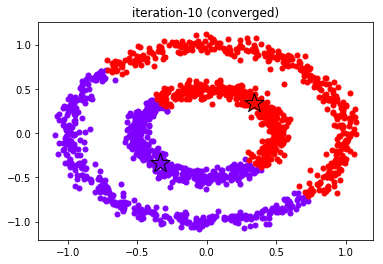

converged!
Total time taken: 1455.0


In [188]:
kMeansKernel(circle,k=2,final=True)

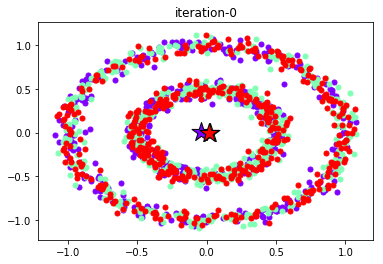

Cluster member numbers- 0 :  748
Cluster member numbers- 1 :  748
Cluster member numbers- 2 :  748


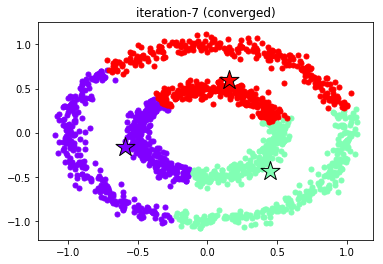

converged!
Total time taken: 947.0


In [189]:
kMeansKernel(circle,k=3,final=True)

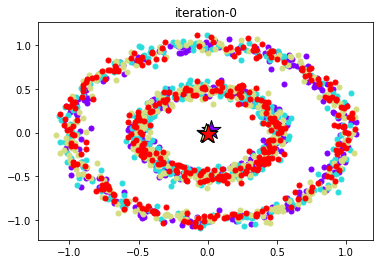

Cluster member numbers- 0 :  642
Cluster member numbers- 1 :  642
Cluster member numbers- 2 :  642
Cluster member numbers- 3 :  642


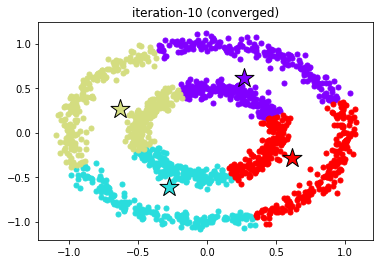

converged!
Total time taken: 1207.0


In [190]:
kMeansKernel(circle,k=4,final=True)

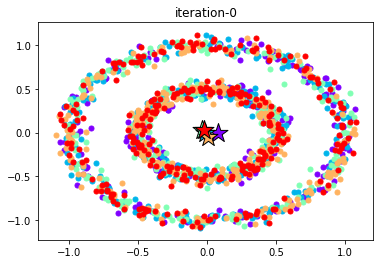

Cluster member numbers- 0 :  531
Cluster member numbers- 1 :  531
Cluster member numbers- 2 :  531
Cluster member numbers- 3 :  531
Cluster member numbers- 4 :  531


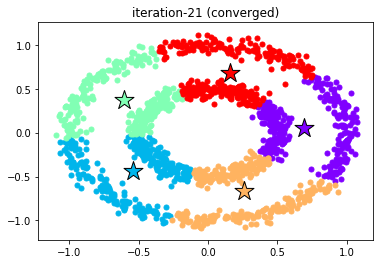

converged!
Total time taken: 2285.0


In [191]:
kMeansKernel(circle,k=5,final=True)

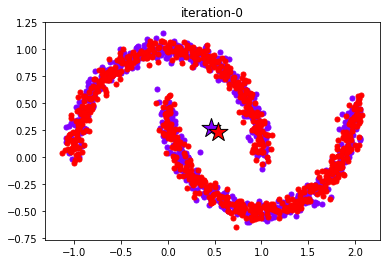

Cluster member numbers- 0 :  747
Cluster member numbers- 1 :  747


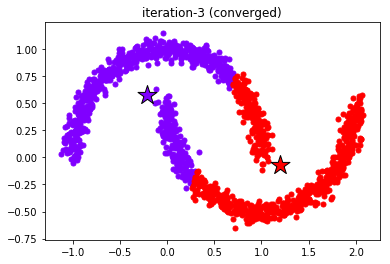

converged!
Total time taken: 537.0


In [192]:
kMeansKernel(moon,k=2,final=True)

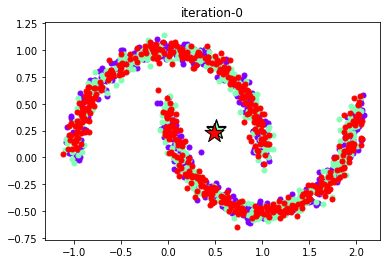

Cluster member numbers- 0 :  459
Cluster member numbers- 1 :  459
Cluster member numbers- 2 :  459


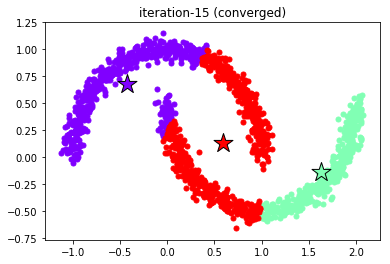

converged!
Total time taken: 1881.0


In [193]:
kMeansKernel(moon,k=3,final=True)

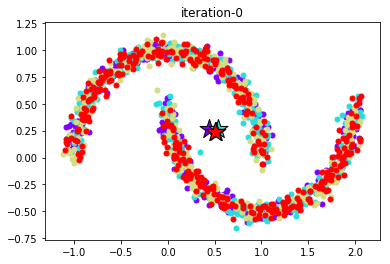

Cluster member numbers- 0 :  683
Cluster member numbers- 1 :  683
Cluster member numbers- 2 :  683
Cluster member numbers- 3 :  683


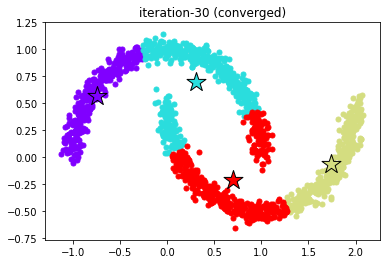

converged!
Total time taken: 3459.0


In [194]:
kMeansKernel(moon,k=4,final=True)

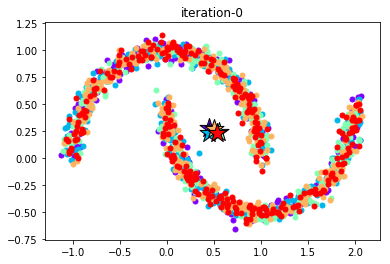

Cluster member numbers- 0 :  498
Cluster member numbers- 1 :  498
Cluster member numbers- 2 :  498
Cluster member numbers- 3 :  498
Cluster member numbers- 4 :  498


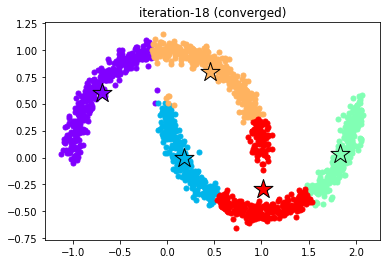

converged!
Total time taken: 2002.0


In [195]:
kMeansKernel(moon,k=5,final=True)

**Analysis**

As we increased the number of clusters, the classification did not get any better. We are still getting wrong results.

The time taken(in seconds) for each trial is shown below:

Dataset / k | 2 | 3 | 4 | 5 
--- | --- | --- | --- | ---
Moon | 537 | 1881 | 3459 | 2002
Circle | 1455 | 947 | 1207 | 2285

As k is increased, the amount of time taken seems to have an increasing trend too, although the relationship may not be very obvious due to the large variance as we only ran each trial once.

### Testing with different Init Methods
We will now test both datasets with all the initialisation methods.

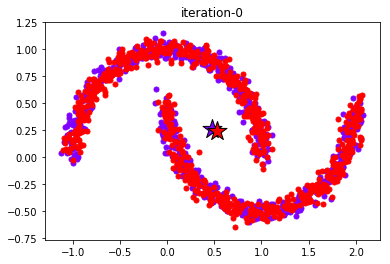

Cluster member numbers- 0 :  764
Cluster member numbers- 1 :  764


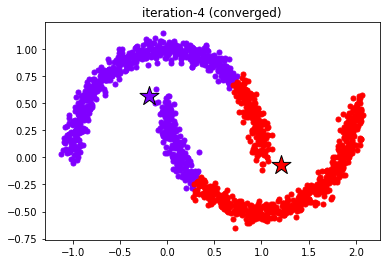

converged!
Total time taken: 767.0


In [198]:
kMeansKernel(moon,method="random",final=True)

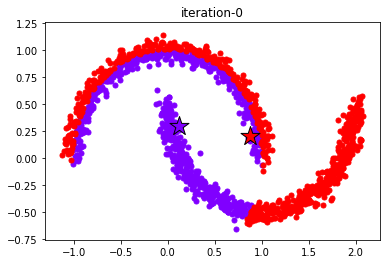

Cluster member numbers- 0 :  765
Cluster member numbers- 1 :  765


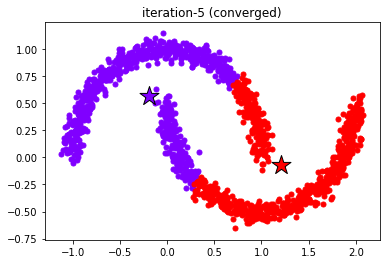

converged!
Total time taken: 888.0


In [199]:
kMeansKernel(moon,method="byOriginDistance",final=True)

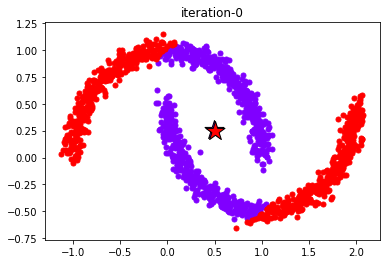

Cluster member numbers- 0 :  877
Cluster member numbers- 1 :  877


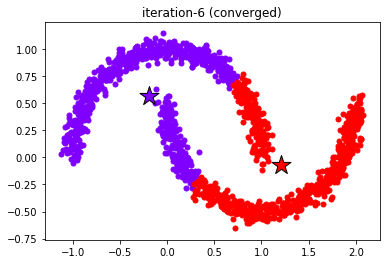

converged!
Total time taken: 980.0


In [200]:
kMeansKernel(moon,method="byCenterDistance",final=True)

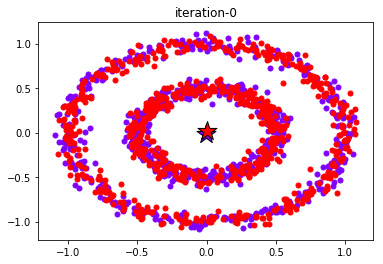

Cluster member numbers- 0 :  754
Cluster member numbers- 1 :  754


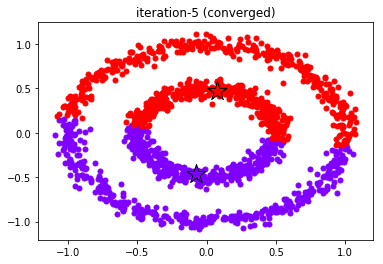

converged!
Total time taken: 921.0


In [201]:
kMeansKernel(circle,method="random",final=True)

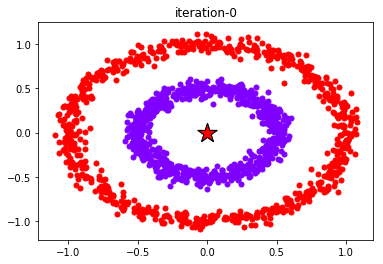

Cluster member numbers- 0 :  750
Cluster member numbers- 1 :  750


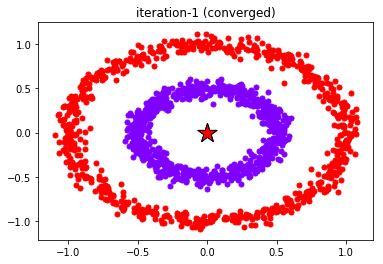

converged!
Total time taken: 264.0


In [202]:
kMeansKernel(circle,method="byOriginDistance",final=True)

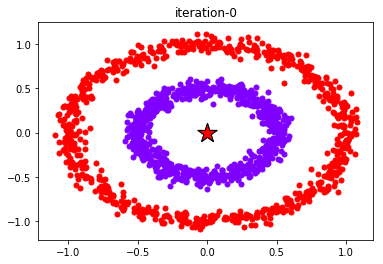

Cluster member numbers- 0 :  750
Cluster member numbers- 1 :  750


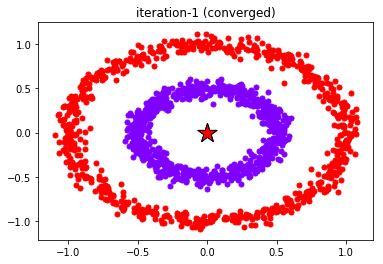

converged!
Total time taken: 273.0


In [203]:
kMeansKernel(circle,method="byCenterDistance",final=True)

**Analysis**

We see that byOriginDistance and byCenterDistance init methods managed to classify the circle dataset correctly, likely due to the fact that when it initialised, it was very close to the correct clustering already. However, it still classified the moon dataset incorrectly, likely due to the fact that the RBF kernel is still unable to consider the peculiar shape of the moon dataset.

The time taken(in seconds) for each trial is shown below:

Dataset / initMethod | random | byOriginDistance | byCenterDistance 
--- | --- | --- | ---
Moon | 767 | 888 | 980
Circle | 961 | 264 | 273

For the moon dataset, the random initialisation took the shortest time, follow by byOriginDistance, and then byCenterDistance, even though they all eventually produced the same result.

For the circle dataset, the random initialisation took significantly longer time while achieving the wrong result. On the other hand, both initialisation by origin distance and by center distance took only 1 iteration to achieve convergence, and had very similar time taken, since both methods are essentially the same for the circle dataset. This is because the when initiated, the data points were already corrrectly clustered.

This shows that while a clustering or initialisation method may work better for certain datasets, it is not guaranteed to improve performance, as shown in the moon dataset.

## Spectral Clustering
We will now try to use spectral clustering to cluster the data. Spectral clustering uses the connectivity between the data points to cluster them. It is desired as it makes no assumption on the shape of the clusters unlike many other clustering methods.

To perform a spectral clustering we need 3 main steps:

  * Create a similarity graph between our N objects to cluster.
  * Compute the first k eigenvectors of its Laplacian matrix to define a feature vector for each object.
  * Run k-means on these features to separate objects into k classes.
  
We first build a similarity Matrix using a double for loop that iterates through all the data, and we use the RBF kernel to compute each entry in the matrix.

In [236]:
def buildSimmilarityMatrix(dataIn,sigma=1.5):
    nData = dataIn.shape[0]
    result = np.matrix(np.full((nData,nData), 0, dtype=np.float))
    for i in range(0,nData):
        for j in range(0, nData):
            weight = RbfKernel(dataIn[i, :], dataIn[j, :], sigma=sigma)
            result[i,j] = weight
    return result

def RbfKernel(data1, data2, sigma):
    delta =np.matrix(abs(np.subtract(data1, data2)))
    squaredEuclidean = (np.square(delta).sum(axis=1))
    result = np.exp(-(squaredEuclidean)/(2*sigma**2))
    return result

We will then build a degree matrix, which is a diagonal matrix where each entry is the summation of the respective row of the simmilarity matrix.

In [226]:
def buildDegreeMatrix(similarityMatrix):
    diag = np.array(similarityMatrix.sum(axis=1)).ravel()
    result = np.diag(diag)
    return result

After that, we may obtain the Laplacian Matrix, which is the degree matrix subtracting away the simmilarity matrix.

In [227]:
def unnormalizedLaplacian(simMatrix, degMatrix):
    result = degMatrix - simMatrix
    return result

Afterwards, we transform our Laplacian Matrix into spectral values. We find out the eigenvalues and eigenvectors with the numpy library, and look for the k smallest eigenvalues. We then convert the corresponding eigenvector into a column matrix and return the concatenated eigenvectors as a matrix.

In [291]:
def transformToSpectral(laplacian,k=2):
    e_vals, e_vecs = LA.eig(np.matrix(laplacian))  #numpy library to find eigenvalues and eigenvectors
    ind = e_vals.real.argsort()[:k]  #sort eigenvalue and obtain index
    result = np.ndarray(shape=(laplacian.shape[0],0))
    for i in range(1, ind.shape[0]):  #start with index 1 to avoid the zero eigen value in fully connected graphs
        cor_e_vec = np.transpose(np.matrix(e_vecs[:,np.asscalar(ind[i])]))  # find corresponding eigenvector
        result = np.concatenate((result, cor_e_vec), axis=1)   #concatenate into matrix
    return result

We then pass the transformed data as an input to apply kmeans clustering

In [253]:
def kMeansSpectral(data, method="random", k=2, sigma=1.5, final=False):  # init options: random, kmeans++, badInit, zeroInit
    startTime = np.around(time.time(), decimals=0)
    simMat = buildSimmilarityMatrix(data,sigma=sigma)
    degMat = buildDegreeMatrix(simMat)
    lapMat = unnormalizedLaplacian(simMat, degMat)
    transformedData = transformToSpectral(lapMat)
    centroidInitTransf = initCentroid(transformedData, method, k)
    nCluster = centroidInitTransf.shape[0]
    #looping until converged
    global iterationCounter
    iterationCounter = 0
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(transformedData.shape[0], 0))
        #assign data to cluster whose centroid is the closest one
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInitTransf[i, :], transformedData.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(transformedData, centroidRepeated))
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMemberTransf = [[] for i in range(k)]
        listClusterMemberOri = [[] for i in range(k)]
        for i in range(0, transformedData.shape[0]):#assign data to cluster regarding cluster matrix
            listClusterMemberTransf[np.asscalar(clusterMatrix[i])].append(np.array(transformedData[i, :]).ravel())
            listClusterMemberOri[np.asscalar(clusterMatrix[i])].append(np.array(data[i, :]).ravel())
        #calculate new centroid
        newCentroidTransf = np.ndarray(shape=(0, centroidInitTransf.shape[1]))
        newCentroidOri = np.ndarray(shape=(0, data.shape[1]))
        if(final==False):
            print("iteration: ", iterationCounter) 
        for i in range(0,nCluster):
            memberClusterTransf = np.asmatrix(listClusterMemberTransf[i])
            memberClusterOri = np.asmatrix(listClusterMemberOri[i])
            if(final==False):
                print("cluster members number-", i+1, ": ", memberClusterTransf.shape)
            centroidClusterTransf = memberClusterTransf.mean(axis=0)
            centroidClusterOri = memberClusterOri.mean(axis=0)
            newCentroidTransf = np.concatenate((newCentroidTransf, centroidClusterTransf), axis=0)
            newCentroidOri = np.concatenate((newCentroidOri, centroidClusterOri), axis=0)
        #break when converged
        if((centroidInitTransf == newCentroidTransf).all()):
            break
        # update new centroid
        centroidInitTransf = newCentroidTransf
        if(final==False):
            plotClusterResult(listClusterMemberOri, newCentroidOri, str(iterationCounter), 0)
    plotClusterResult(listClusterMemberOri, newCentroidOri, str(iterationCounter) + " (converged)", 1)
    print("converged!")
    endTime = np.around(time.time(), decimals=0)
    print("total time taken: " + str(endTime-startTime) + "s")
    
    
def initCentroid(data, method, k):
    if (method=="random"):
        result = data[np.random.choice(data.shape[0], k, replace=False)]
    if (method=="kmeans++"):
        euclideanMatrixAllCentroid = np.ndarray(shape=(data.shape[0], 0))
        allCentroid = np.ndarray(shape=(0,data.shape[1]))
        first = data[np.random.choice(data.shape[0], 1, replace=False)]
        allCentroid = np.concatenate((allCentroid, first), axis=0)
        repeatedCent = np.repeat(first, data.shape[0], axis=0)
        deltaMatrix = abs(np.subtract(data, repeatedCent))
        euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
        indexNextCent = (np.argmax(np.matrix(euclideanMatrix)))
        if(k>1):
            for a in range(1,k):
                nextCent = np.matrix(data[np.asscalar(indexNextCent),:])
                allCentroid = np.concatenate((allCentroid, nextCent), axis=0)
                for i in range(0,allCentroid.shape[0]):
                    repeatedCent = np.repeat(allCentroid[i,:], data.shape[0], axis=0)
                    deltaMatrix = abs(np.subtract(data, repeatedCent))
                    euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
                    euclideanMatrixAllCentroid = \
                        np.concatenate((euclideanMatrixAllCentroid, euclideanMatrix), axis=1)
                euclideanFinal = np.min(np.matrix(euclideanMatrixAllCentroid), axis=1)
                indexNextCent = np.argmax(np.matrix(euclideanFinal))
        result = allCentroid
    if (method=="badInit"):
        allCentroid = np.ndarray(shape=(0,data.shape[1]))
        firstIndex = np.random.randint(0,data.shape[0])
        first = np.matrix(data[firstIndex,:])
        data = np.delete(data, firstIndex, 0)
        allCentroid = np.concatenate((allCentroid, first), axis=0)
        repeatedCent = np.repeat(first, data.shape[0], axis=0)
        deltaMatrix = abs(np.subtract(data, repeatedCent))
        euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
        indexNextCent = (np.argmin(np.matrix(euclideanMatrix)))
        if(k>1):
            for a in range(1,k):
                nextCent = np.matrix(data[np.asscalar(indexNextCent),:])
                data = np.delete(data, np.asscalar(indexNextCent), 0)
                euclideanMatrixAllCentroid = np.ndarray(shape=(data.shape[0], 0))
                allCentroid = np.concatenate((allCentroid, nextCent), axis=0)
                for i in range(0,allCentroid.shape[0]):
                    repeatedCent = np.repeat(allCentroid[i,:], data.shape[0], axis=0)
                    deltaMatrix = abs(np.subtract(data, repeatedCent))
                    euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
                    euclideanMatrixAllCentroid = \
                        np.concatenate((euclideanMatrixAllCentroid, euclideanMatrix), axis=1)
                euclideanFinal = np.min(np.matrix(euclideanMatrixAllCentroid), axis=1)
                indexNextCent = np.argmin(np.matrix(euclideanFinal))
        result = allCentroid
    if (method=="zeroInit"):
        result = np.matrix(np.full((k,data.shape[1]),0))
    return result

### Example
We will demonstrate the code and the resulting plotted graphs with the default settings for both circle and moon datasets.

iteration:  1
cluster members number- 1 :  (521, 1)
cluster members number- 2 :  (979, 1)


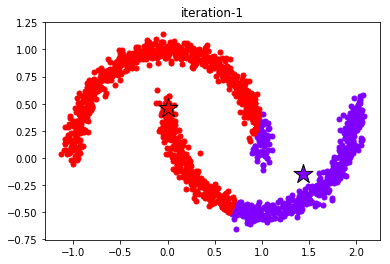

iteration:  2
cluster members number- 1 :  (565, 1)
cluster members number- 2 :  (935, 1)


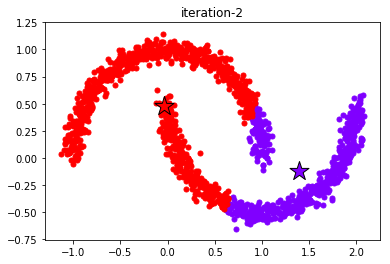

iteration:  3
cluster members number- 1 :  (610, 1)
cluster members number- 2 :  (890, 1)


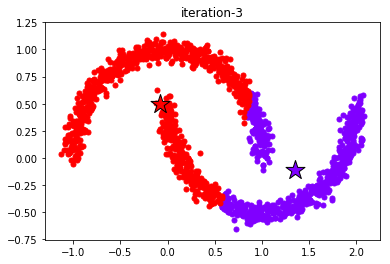

iteration:  4
cluster members number- 1 :  (639, 1)
cluster members number- 2 :  (861, 1)


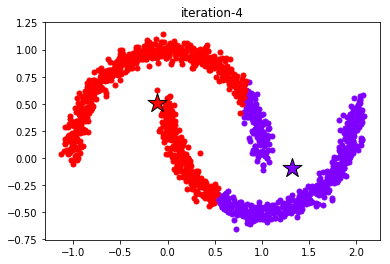

iteration:  5
cluster members number- 1 :  (668, 1)
cluster members number- 2 :  (832, 1)


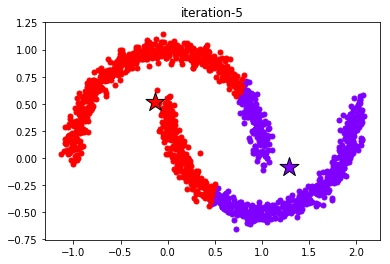

iteration:  6
cluster members number- 1 :  (692, 1)
cluster members number- 2 :  (808, 1)


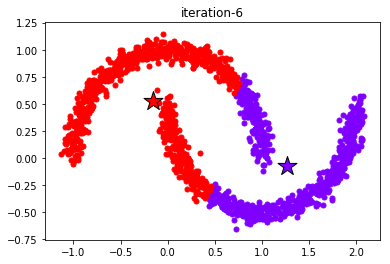

iteration:  7
cluster members number- 1 :  (710, 1)
cluster members number- 2 :  (790, 1)


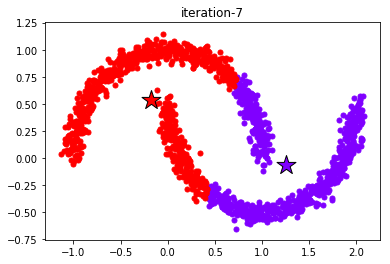

iteration:  8
cluster members number- 1 :  (726, 1)
cluster members number- 2 :  (774, 1)


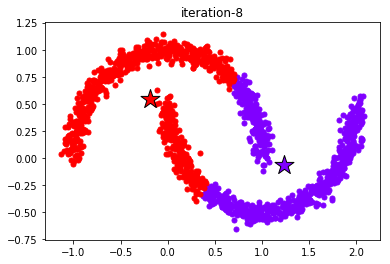

iteration:  9
cluster members number- 1 :  (731, 1)
cluster members number- 2 :  (769, 1)


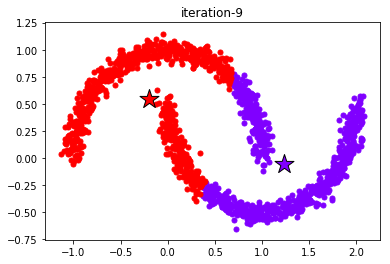

iteration:  10
cluster members number- 1 :  (734, 1)
cluster members number- 2 :  (766, 1)


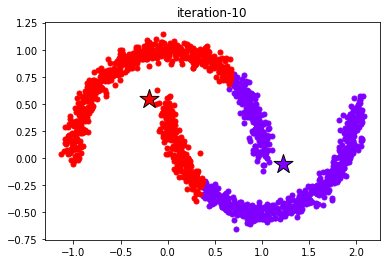

iteration:  11
cluster members number- 1 :  (734, 1)
cluster members number- 2 :  (766, 1)


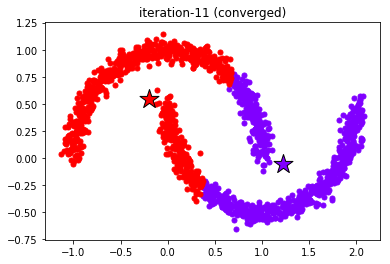

converged!
total time taken: 110.0s


In [254]:
kMeansSpectral(moon)

iteration:  1
cluster members number- 1 :  (770, 1)
cluster members number- 2 :  (730, 1)


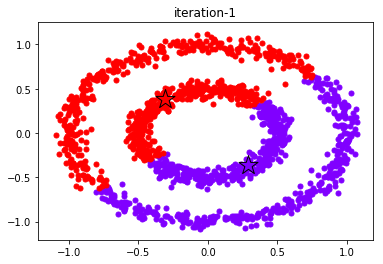

iteration:  2
cluster members number- 1 :  (769, 1)
cluster members number- 2 :  (731, 1)


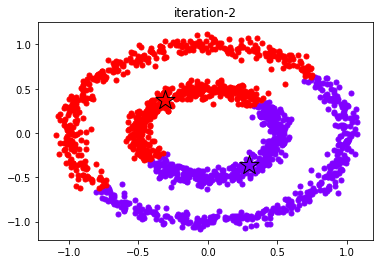

iteration:  3
cluster members number- 1 :  (769, 1)
cluster members number- 2 :  (731, 1)


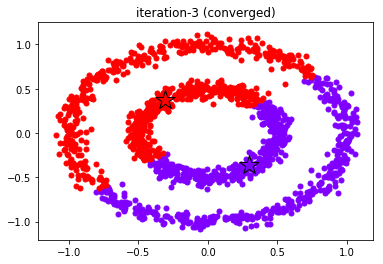

converged!
total time taken: 111.0s


In [242]:
kMeansSpectral(circle)

Unexpectedly, the spectral clustering method did not correctly classify the data. I suspect this might be because of the relatively high sigma value of 1.5 used in the RBF kernel, given the small scale of the data sets. Let us try again with a smaller sigma that might be more suitable: 0.05.

iteration:  1
cluster members number- 1 :  (750, 1)
cluster members number- 2 :  (750, 1)


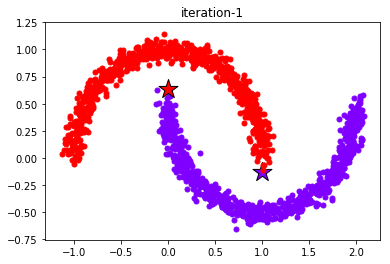

iteration:  2
cluster members number- 1 :  (750, 1)
cluster members number- 2 :  (750, 1)


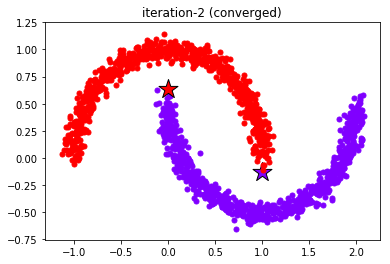

converged!
total time taken: 105.0s


In [243]:
kMeansSpectral(moon,sigma=0.05)

iteration:  1
cluster members number- 1 :  (750, 1)
cluster members number- 2 :  (750, 1)


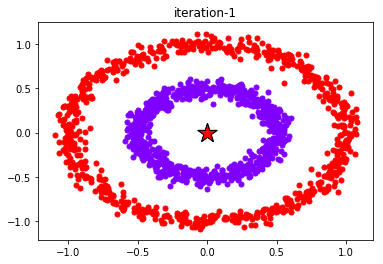

iteration:  2
cluster members number- 1 :  (750, 1)
cluster members number- 2 :  (750, 1)


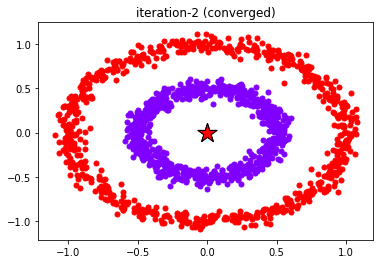

converged!
total time taken: 103.0s


In [244]:
kMeansSpectral(circle,sigma=0.05)

We see that it is now clustered correctly. This shows that the sigma value chosen for the RBF kernel also plays a big part in affecting the final clustering result. (I tested the kernel kmeans with sigma=0.05 but it still classified wrongly, showing that kernel kmeans is really insufficient in this case even after tweaking the sigma value) However, using a sigma value that is too small risks overfitting, and should hence be carefully handled. (A high sigma value in contrast has a higher risk of underfitting)

We may also note that the time taken for spectral clustering is significantly shorter than kernel kmeans. However, it is still significantly longer than k means clustering due to the amount of time taken to compute the Laplacian matrix. We should also note that it takes very few iteration, so the clustering step may in fact take shorter time than the standard kmeans.

### Adjusting k(amount of clusters) and initialisation method
We will now measure the performance as we vary the k and method parameters. However, due to the relatively larger amount of taken taken to run the function each time, we would not be able to carry out large amount of trials as we did for k means clustering. Instead, we will be measuring the time taken to run the function once.

### Testing with different k
We will now test both datasets with k ranging from 2 to 5, using the default random initialisation and with sigma = 0.05

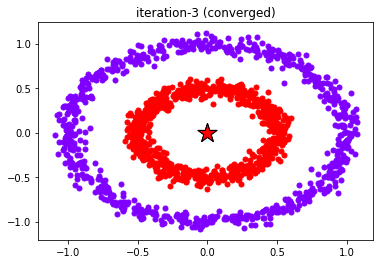

converged!
total time taken: 98.0s


In [271]:
kMeansSpectral(circle,k=2,final=True,sigma=0.05)

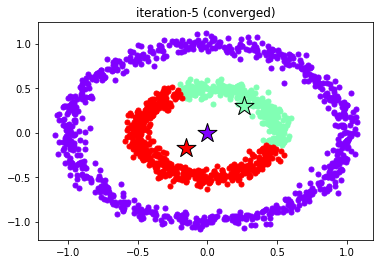

converged!
total time taken: 96.0s


In [272]:
kMeansSpectral(circle,k=3,final=True,sigma=0.05)

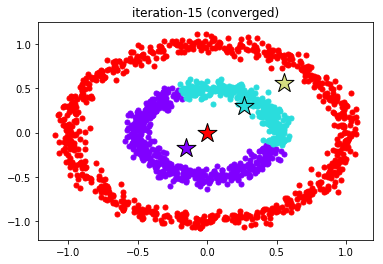

converged!
total time taken: 101.0s


In [273]:
kMeansSpectral(circle,k=4,final=True,sigma=0.05)

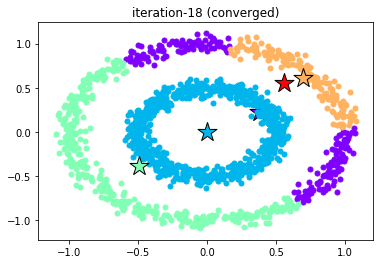

converged!
total time taken: 101.0s


In [274]:
kMeansSpectral(circle,k=5,final=True,sigma=0.05)

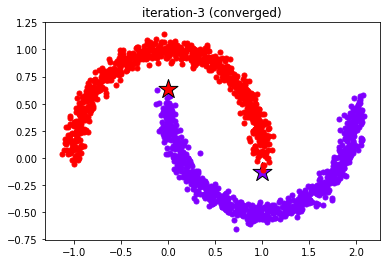

converged!
total time taken: 107.0s


In [275]:
kMeansSpectral(moon,k=2,final=True,sigma=0.05)

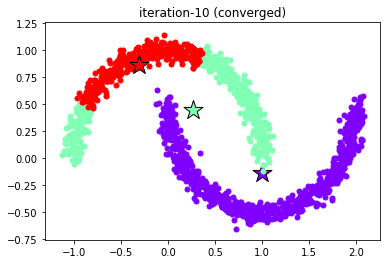

converged!
total time taken: 104.0s


In [276]:
kMeansSpectral(moon,k=3,final=True,sigma=0.05)

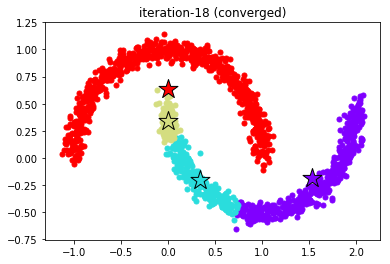

converged!
total time taken: 114.0s


In [277]:
kMeansSpectral(moon,k=4,final=True,sigma=0.05)

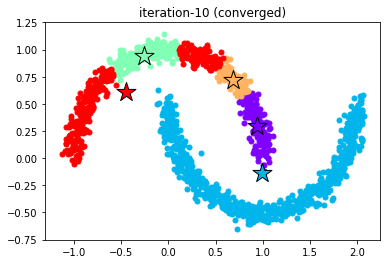

converged!
total time taken: 111.0s


In [278]:
kMeansSpectral(moon,k=5,final=True,sigma=0.05)

**Analysis**

As we increased the number of clusters, the classification did not get any better. We are still getting wrong results.

The time taken(in seconds) for each trial is shown below:

Dataset / k | 2 | 3 | 4 | 5 
--- | --- | --- | --- | ---
Moon | 107 | 104 | 114 | 111
Circle | 98 | 96 | 101 | 101

As shown above, the time taken for each trial as k is increased stays almost constant. This shows that it takes approximately the same amount of time for spectral clustering to cluster datasets with more clusters. The timings are also very consistent with little variance. This indicates that spectral clustering performs rather consistently.

For k=2, it managed to cluster both datasets correctly as predicted. 

For both k=3 and k=4, it recognised the outer circle for circle dataset as one cluster, and splitted the inner circle into two clusters. However, at k=5, it chose the inner circle as one cluster instead and splitted the outer circle into 3 clusters.

For all values of k above 2, the code managed to correctly classify one of the clusters while splitting the other cluster into sub clusters. However, the correctly identified cluster is sometimes the top(left) cluster and sometimes the bottom(right) one.

### Testing with different Init Methods
We will now test both datasets with all the initialisation methods, with sigma value = 0.05

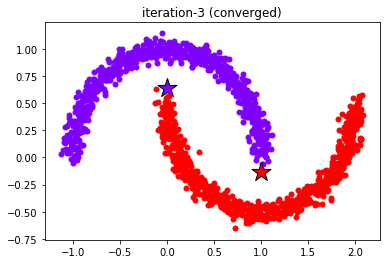

converged!
total time taken: 101.0s


In [279]:
kMeansSpectral(moon,method="random",final=True,sigma=0.05)

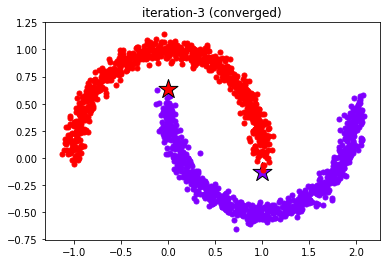

converged!
total time taken: 111.0s


In [280]:
kMeansSpectral(moon,method="badInit",final=True,sigma=0.05)

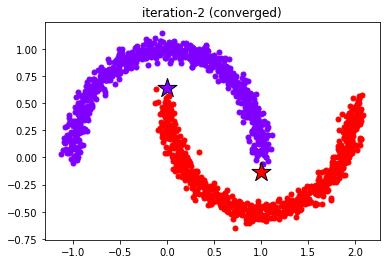

converged!
total time taken: 98.0s


In [281]:
kMeansSpectral(moon,method="kmeans++",final=True,sigma=0.05)

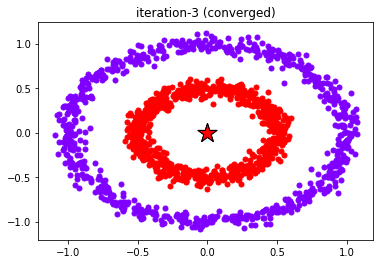

converged!
total time taken: 98.0s


In [282]:
kMeansSpectral(circle,method="random",final=True,sigma=0.05)

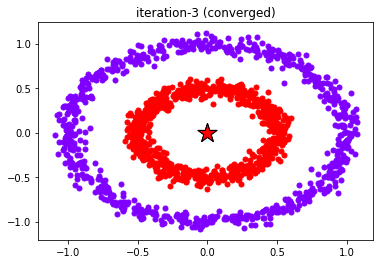

converged!
total time taken: 96.0s


In [283]:
kMeansSpectral(circle,method="badInit",final=True,sigma=0.05)

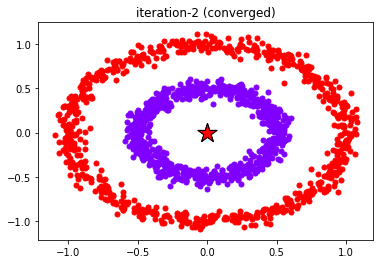

converged!
total time taken: 102.0s


In [284]:
kMeansSpectral(circle,method="kmeans++",final=True,sigma=0.05)

**Analysis**

No matter the initialisation method, both datasets were correctly clustered, albeit at marginally different speed.

The time taken(in seconds) for each trial is shown below:

Dataset / initMethod | random | badInit | kmeans++ 
--- | --- | --- | ---
Moon | 101 | 111 | 98
Circle | 98 | 96 | 102

Consistent with our observation from k means clustering above, for the moon dataset, kmeans++ performed the best, followed by random, and finally badInit. 

However, for the circle dataset, the order of performance was reversed, namely the badInit was the fastest while kmeans++ was the slowest. I believe this is due to the special nature of the dataset, such that the centroids of the two clusters are in fact close together. This is unintuitive as most algorithms assumed that the final centroids are likely to be far away. As a result, badInit which assumes the centroids are close together in fact performed the best, and kmeans++ which assumed the centroids to be furtherst away performed the worst.

Nevertheless, the difference is rather small for both datasets and almost negligible. This shows that the initialisation method chosen will not greatly affect the performance of spectral clustering, which supports our observation above that it is rather consistent.


**Do the data points within the same cluster have the same coordinates in eigenspace of graph Laplacian?**
There will be 


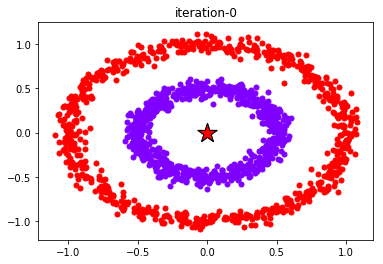

Cluster member numbers- 0 :  750
Cluster member numbers- 1 :  750
iteration- 1 :  319.0  seconds


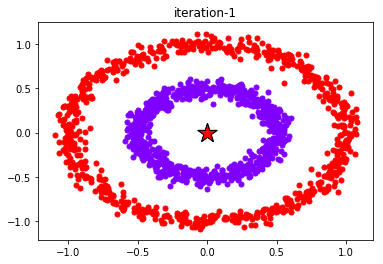

KeyboardInterrupt: 

In [292]:
kMeansKernel(circle,method="byOriginDistance")